In [16]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='STHeiti', size=13)
import numpy as np

# 所涉及到的算法
- Logistic Regression
- Random forest
- SVM
- Model ensemble

In [2]:
train = pd.read_csv("input/train.csv")#读取CSV文件
train.head()#看开头的一些信息

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()
#发现有些列，比如Cabin有非常多的缺失值
#发现一些重要的属性，例如Age，也有缺失

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.describe()
#mean中数据值得观察

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


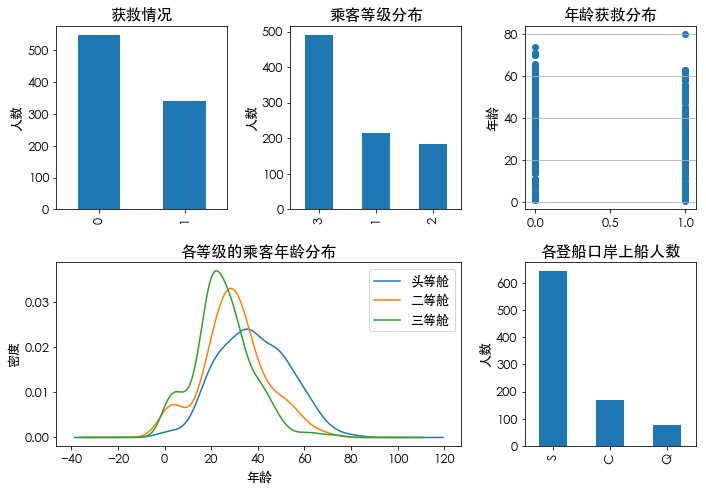

In [48]:
fig = plt.figure()
fig.set(alpha=0.2)#设定图标颜色alpha参数
fig.set_figheight(7);fig.set_figwidth(10)#设定图片长宽

plt.subplot2grid((2,3),(0,0))#一张大图分成两个小图
train.Survived.value_counts().plot(kind='bar')#使用柱形图表示
plt.title("获救情况")#标题
plt.ylabel(u'人数')

plt.subplot2grid((2,3),(0,1))
train.Pclass.value_counts().plot(kind='bar')
plt.title(u'乘客等级分布')
plt.ylabel(u'人数')

plt.subplot2grid((2,3),(0,2))
plt.scatter(train.Survived,train.Age)
plt.title(u'年龄获救分布')
plt.ylabel(u'年龄')
plt.grid(b=True,which='major',axis='y')

plt.subplot2grid((2,3),(1,0),colspan=2)
train.Age[train.Pclass == 1].plot(kind='kde')
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
plt.xlabel(u'年龄')
plt.ylabel(u'密度')
plt.title(u'各等级的乘客年龄分布')
plt.legend((u'头等舱',u'二等舱',u'三等舱'),loc='best')

plt.subplot2grid((2,3),(1,2))
train.Embarked.value_counts().plot(kind='bar')
plt.title(u'各登船口岸上船人数')
plt.ylabel(u'人数')

plt.tight_layout()#间距调整
plt.show()

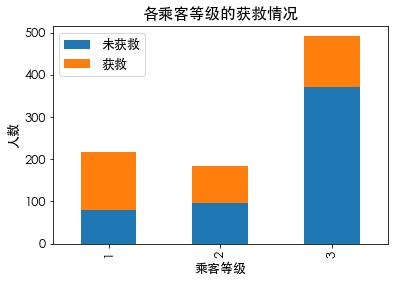

In [51]:
fig = plt.figure()
fig.set(alpha=0.2)

survived0 = train.Pclass[train.Survived == 0].value_counts()
survived1 = train.Pclass[train.Survived == 1].value_counts()
df = pd.DataFrame({u'获救':survived1,u'未获救':survived0})
df.plot(kind='bar',stacked=True)
plt.title(u'各乘客等级的获救情况')
plt.xlabel(u'乘客等级')
plt.ylabel(u'人数')
plt.show()

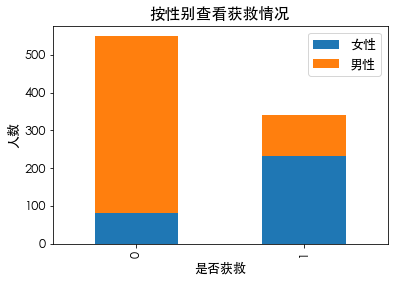

In [53]:
#看看各性别的获救比例
fig = plt.figure()
fig.set(alpha=0.2)

survivedMale = train.Survived[train.Sex == 'male'].value_counts()
survivedFemale = train.Survived[train.Sex == 'female'].value_counts()
df = pd.DataFrame({u'男性':survivedMale,u'女性':survivedFemale})
df.plot(kind='bar',stacked=True)
plt.title(u'按性别查看获救情况')
plt.ylabel(u'人数')
plt.xlabel(u'是否获救')
plt.show()

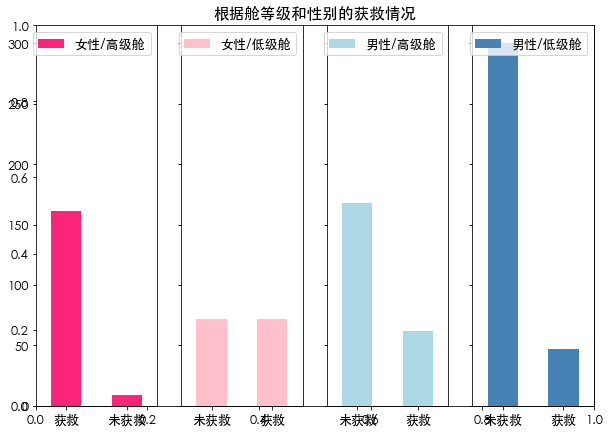

In [73]:
#然后我们再来看看各种舱级别情况下各性别的获救情况
fig=plt.figure()
fig.set(alpha=0.65) # 设置图像透明度，无所谓
fig.set_figheight(7);fig.set_figwidth(10)#设定图片长宽
plt.title(u"根据舱等级和性别的获救情况")

ax1=fig.add_subplot(141)
train.Survived[train.Sex == 'female'][train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
train.Survived[train.Sex == 'female'][train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
train.Survived[train.Sex == 'male'][train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
train.Survived[train.Sex == 'male'][train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')

plt.show()

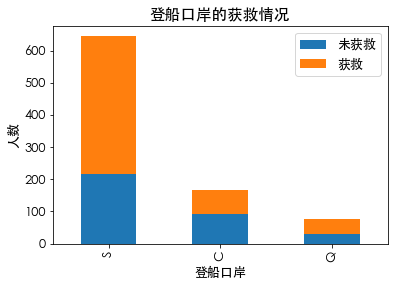

In [75]:
#查看登船口岸对获救情况的影响
fig = plt.figure()
fig.set(alpha=0.2)

survived0 = train.Embarked[train.Survived == 0].value_counts()
survived1 = train.Embarked[train.Survived == 1].value_counts()
df = pd.DataFrame({u'获救':survived0,u'未获救':survived1})
df.plot(kind='bar',stacked=True)
plt.title(u'登船口岸的获救情况')
plt.ylabel(u'人数')
plt.xlabel(u'登船口岸')
plt.show()

In [79]:
#查看亲戚血缘关系对是否获救有无影响
relation = ['SibSp','Parch']
for relate in relation:
    g = train.groupby([relate,'Survived'])
    df = pd.DataFrame(g.count()['PassengerId'])
    print(df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


In [83]:
#ticket是船票编号，应该是unique的，和最后的结果没有太大的关系，先不纳入考虑的特征范畴把
#cabin只有204个乘客有值，我们先看看它的一个分布
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
D              3
F33            3
E101           3
C22 C26        3
F2             3
D36            2
F4             2
D26            2
E44            2
E67            2
E8             2
B18            2
C78            2
C124           2
C123           2
E121           2
B28            2
F G73          2
B22            2
C92            2
C126           2
D17            2
E24            2
B5             2
B35            2
C65            2
E33            2
              ..
C95            1
A10            1
C54            1
E10            1
C118           1
A6             1
B82 B84        1
A32            1
C50            1
B94            1
C62 C64        1
B102           1
B86            1
D30            1
A16            1
B79            1
F G63          1
E34            1
E40            1
T              1
C110           1
D50            1
E36            1
C128           1
A36            1
D7             1
A20            1
E38           